In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [17]:
plt.style.use("default")
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 21

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [10]:
kde_df = pd.read_csv("events_kde.csv", sep=",", header=None).T
kde_df.columns = ["x", "y"]
kde_df.head()

,x,y
0,-2765.918720,1.603734e-07
1,-2525.463307,3.583183e-07
2,-2285.007894,7.570544e-07
3,-2044.552481,1.506490e-06
4,-1804.097068,2.823188e-06


In [7]:
%matplotlib qt
#%matplotlib inline 
plt.plot(kde_df["x"], kde_df["y"], label="")
plt.axvline(x=5000, linestyle="--", c="green", label="Lower bound (5k)")
plt.axvline(x=15000, linestyle="--", c="orange", label="Lower bound (15k)")
plt.show()

In [ ]:
plt.plot(kde_df["x"], np.gradient(kde_df["y"]), label="")

In [ ]:
plt.plot(kde_df["x"], np.cumsum(kde_df["y"]), label="")

In [ ]:
np.percentile(np.cumsum(kde_df["y"]), 25)

In [ ]:
np.percentile(np.cumsum(kde_df["y"]), 60)

In [11]:
cumsum = np.cumsum(kde_df["y"])
best_idx = np.argmin(np.abs(cumsum - 0.003777))
kde_df.iloc[best_idx]

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


x    20077.345507
y        0.000110
Name: 95, dtype: float64

Text(0.5, 0, 'Listening Events')

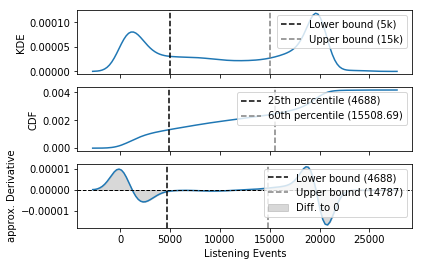

In [5]:
fig, axes = plt.subplots(3, sharex=True)
axes[0].plot(kde_df["x"], kde_df["y"], label="")
axes[0].axvline(x=5000, linestyle="--", c="black", label="Lower bound (5k)")
axes[0].axvline(x=15000, linestyle="--", c="grey", label="Upper bound (15k)")
axes[0].set_ylabel("KDE")
axes[0].legend(loc="upper right")
axes[1].plot(kde_df["x"], np.cumsum(kde_df["y"]), label="")
perc_25 = np.percentile(cumsum, 25)
perc_60 = np.percentile(cumsum, 60)
axes[1].axvline(x=4928.65, linestyle="--", c="black", label="25th percentile (4688)")
axes[1].axvline(x=15508.69, linestyle="--", c="grey", label="60th percentile (15508.69)")
axes[1].set_ylabel("CDF")
axes[1].legend(loc="upper right")
grad = np.gradient(kde_df["y"])
axes[2].plot(kde_df["x"], grad, label="")
axes[2].fill_between(x=kde_df["x"], y1=grad, color="grey", alpha=0.3, label="Diff. to 0")
axes[2].axhline(y=0, linestyle="--", color="black", linewidth=1)
axes[2].axvline(x=4688, linestyle="--", c="black", label="Lower bound (4688)")
axes[2].axvline(x=14787, linestyle="--", c="grey", label="Upper bound (14787)")
axes[2].set_ylabel("approx. Derivative")
axes[2].legend(loc="upper right")
plt.xlabel("Listening Events")
plt.grid0(False)

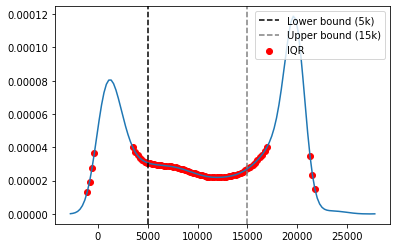

In [4]:
condition = (kde_df["y"] < np.percentile(kde_df["y"], 75)) & (kde_df["y"] > np.percentile(kde_df["y"], 25))
indicator = kde_df[condition]
plt.plot(kde_df["x"], kde_df["y"], label="")
plt.scatter(indicator["x"], indicator["y"], color="red", label="IQR")
plt.axvline(x=5000, linestyle="--", c="black", label="Lower bound (5k)")
plt.axvline(x=15000, linestyle="--", c="grey", label="Upper bound (15k)")
plt.legend(loc="upper right")

In [ ]:
plt.scatter(kde_df["x"], grad, marker="o", alpha=0.3)

In [ ]:
np.argpartition(np.abs(grad), 2)

In [ ]:
kde_df["x"].iloc[[125, 61]]

In [ ]:
data = kde_df["y"]
clipped = np.clip(data, np.median(data) - np.std(data), np.median(data) + np.std(data))

In [ ]:
plt.plot(kde_df["x"], clipped)

In [ ]:
z_scores = np.abs(StandardScaler().fit_transform(kde_df["y"].values.reshape(-1, 1)))

In [ ]:
plt.plot(kde_df["x"], z_scores)

In [ ]:
lof_scores = np.abs(LocalOutlierFactor(algorithm="brute").fit(kde_df["y"].values.reshape(-1, 1)).negative_outlier_factor_)
plt.plot(kde_df["x"], lof_scores)

In [ ]:
kde_df["y"].to_frame().boxplot()

In [ ]:
plt.hist(kde_df["y"], bins=50)

In [5]:
grad = np.gradient(kde_df["y"])

In [ ]:
kde_df["x"].iloc[35:45]

In [ ]:
np.argmin(np.abs(grad)[35:45])

In [ ]:
kde_df.iloc[39]

In [ ]:
kde_df["x"].iloc[55:70]

In [ ]:
np.argmin(np.abs(grad)[55:70])

In [ ]:
kde_df.iloc[61]

In [ ]:
plt.plot(kde_df["x"], np.gradient(grad))

In [8]:
indices = np.where(np.abs(grad) < 0.000001)[0]
kde_df.iloc[indices]

,x,y
0,-2765.918720,1.603734e-07
1,-2525.463307,3.583183e-07
2,-2285.007894,7.570544e-07
31,4688.199080,3.146733e-05
32,4928.654493,3.083524e-05
33,5169.109906,3.036928e-05
34,5409.565319,3.001864e-05
35,5650.020732,2.974797e-05
36,5890.476145,2.953297e-05
37,6130.931558,2.935584e-05


In [9]:
left_border = kde_df.iloc[indices].loc[31]
left_border

x    4688.199080
y       0.000031
Name: 31, dtype: float64

In [10]:
right_border = kde_df.iloc[indices].loc[73]
right_border

x    14787.326423
y        0.000026
Name: 73, dtype: float64

In [19]:
%matplotlib qt
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(kde_df["x"], kde_df["y"], label="")
axes[0].set_ylabel("Density")
axes[0].grid(False)

grad = np.gradient(kde_df["y"])
axes[1].plot(kde_df["x"], grad, label="")
#axes[1].fill_between(x=kde_df["x"], y1=grad, color="grey", alpha=0.3, label="Diff. to 0")
axes[1].axhline(y=0, linestyle="--", color="grey", linewidth=1)
axes[1].axvline(x=4688, linestyle="--", c="black", label="Lower bound (4688)")
axes[1].axvline(x=14787, linestyle="dotted", c="black", label="Upper bound (14787)")
axes[1].set_ylabel("Gradient")
axes[1].grid(False)
plt.legend(loc="upper right")

plt.xlabel("Listening Events")

Text(0.5, 0, 'Listening Events')

In [9]:
kde_df["x"][2] - kde_df["x"][1]

240.45541291492282

In [10]:
kde_df["x"][1] - kde_df["x"][0]

240.45541291492327

In [11]:
dist = kde_df["x"][2] - kde_df["x"][1]

In [13]:
(kde_df["y"] * dist).sum()

0.9999999999999998